In [2]:
import numpy as np
from scipy import signal
def terrain_analysis(array, size):
    """calculate terrain derivatives based on the Evans Young method

    Args:
      array (ndarray): elevation data array, must be 2D array
      size (float,float): size of sample in projected coordinates

    Returns:
      (ndarray): 3d array with original elevation data and derivatives (dim,dim,bands)
    """

    px, py = size[0]/array.shape[-1], size[1]/array.shape[-2]

    g = [[(-1/(6*px)), 0 , (1/(6*px))],
         [(-1/(6*px)), 0 , (1/(6*px))],
         [(-1/(6*px)), 0 , (1/(6*px))]]
    h = [[(1/(6*py)),(1/(6*py)),(1/(6*py))],
         [0,0,0],
         [(-1/(6*py)),(-1/(6*py)),(-1/(6*py))]]
    d = [[(1/(3*(px**2))),(-2/(3*(px**2))),(1/(3*(px**2)))],
         [(1/(3*(px**2))),(-2/(3*(px**2))),(1/(3*(px**2)))],
         [(1/(3*(px**2))),(-2/(3*(px**2))),(1/(3*(px**2)))]]
    e = [[(1/(3*(py**2))),(1/(3*(py**2))),(1/(3*(py**2)))],
         [(-2/(3*(py**2))),(-2/(3*(py**2))),(-2/(3*(py**2)))],
         [(1/(3*(py**2))),(1/(3*(py**2))),(1/(3*(py**2)))]]
    f = [[(-1/(4*(px*py))),0, (1/(4*(px*py)))],
         [0,0,0],
         [(1/(4*(px*py))),0,(-1/(4*(px*py)))]]

    gi = signal.convolve2d(array, g, boundary='symm', mode='same')
    hi = signal.convolve2d(array, h, boundary='symm', mode='same')
    di = signal.convolve2d(array, d, boundary='symm', mode='same')
    ei = signal.convolve2d(array, e, boundary='symm', mode='same')
    fi = signal.convolve2d(array, f, boundary='symm', mode='same')

    slope  = np.sqrt (np.power(hi,2)+np.power(gi,2))
    aspect = np.arctan(hi/gi)
#     planc  = -1*((np.power(hi, 2)*di)-(2*gi*hi*fi)+(np.power(gi,2)*ei)/(np.power((np.power(gi,2)+np.power(hi,2)),1.5)))
#     profc  = -1*(((np.power(gi,2)*di)+(2*gi*hi*fi) +(np.power(hi,2)*ei))/ ((np.power(gi,2)+np.power(hi,2))*(np.power( (1+np.power(gi,2)+np.power(hi,2)),1.5)) ))
#     meanc  = -1 *( ((1+np.power(hi,2))*di) -(2*gi*hi*fi) +((1+np.power(gi,2))*ei) / (2*np.power( (1+np.power(gi,2)+np.power(hi,2)),1.5)  ))

    return np.stack([array, slope, aspect], axis=-1)



In [3]:
import os
os.getcwd()

'/Users/yifan/Github/DEM_segmentation'

In [12]:
path = os.getcwd()+'/dataset/'
filenames = os.listdir(path)

In [24]:
i=2


In [70]:
hi=1.0
low=0.1
img = np.load(path+filenames[i])[:,:,-1]
img = img / 255.
# img[img > 0.] = 1. - img[img > 0.]      #inv color
minn, maxx = np.min(img[img > 0]), np.max(img[img > 0])
img[img > 0] = low + (img[img > 0] - minn) * (hi - low) / (maxx - minn)

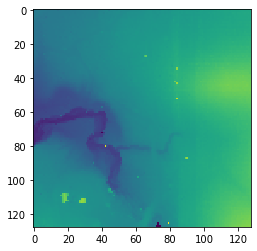

In [71]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [72]:
out = terrain_analysis(img, (3,3))

/Users/yifan/anaconda3/envs/tfvenv/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide


In [73]:
print(np.max(out[:,:,1]),np.min(out[:,:,1]))

9.898297331374513 1.06048550106348e-05


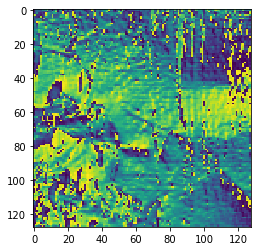

In [69]:
plt.imshow(out[:,:,2])

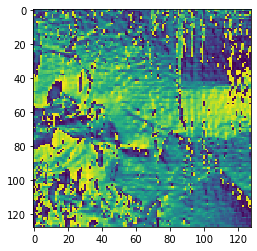

In [64]:
plt.imshow(out[:,:,2])

In [39]:
bimg = np.load(path+filenames[i])

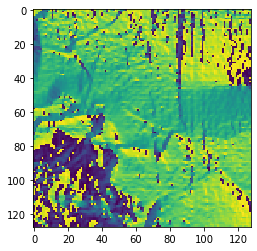

In [51]:
plt.imshow(bimg[:,:,1])

In [47]:
print(np.max(bimg[:,:,0]),np.min(bimg[:,:,0]))

61.215046 0.0
